# Convolutional Neural Network (CNN)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Convert MNIST Image files into tensor of 4-Dimensions
# No. Of Images , Height, Width , Color Channel

transform = transforms.ToTensor()     # transforms: to carry out transformations, ToTensor: to convert image or numpy array to Tensor data type

In [3]:
# Train Data
train_data = datasets.MNIST(root = 'CNN_data', train = True, download=True,transform=transform) 

In [4]:
# Test Data
test_data = datasets.MNIST(root = 'CNN_data', train = False, download=True,transform=transform) 

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: CNN_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: CNN_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
# Create a Small Batch Size for images, say 10

train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)


# Dataloader function divides the input data into batches of specified length

In [8]:
# Define a CNN Model
# Describe Convolutional Layer and What it is doing (2 ConV layers)
# Just an example

conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1)
conv2 = nn.Conv2d(6,16,3,1)


# No padding required since our digits are in the middle.

In [9]:
# Grab 1 MNIST Image
for i, (X_train,y_train) in enumerate(train_data):
    break 

In [10]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
X_train.shape

torch.Size([1, 28, 28])

In [12]:
x = X_train.view(1,1,28,28) # 1 batch of 1 image of 28x28 pixels

In [13]:
# Perform First Convolution
x = F.relu(conv1(x))   # Rectified Linear Unit

In [14]:
# 1 Image , 6 Channels/filters , 26x26 pixel image after Convolution
x.shape

torch.Size([1, 6, 26, 26])

In [15]:
# Pass through the Pooling Layer of filter size =2 and stride length =2
x = F.max_pool2d(x,kernel_size=2,stride=2)

In [16]:
# 1 Image , 6 channels, After pooling, Dim: 26/2 = 13
x.shape

torch.Size([1, 6, 13, 13])

In [17]:
# Second ConV layer:
x = F.relu(conv2(x))

In [18]:
# Without padding , hence corner pixels lost.
x.shape

torch.Size([1, 16, 11, 11])

In [19]:
# Pooling again
x = F.max_pool2d(x,2,2)

In [20]:
# 1 Image , 16 channels, After pooling, Dim: 11/2 = 5
x.shape

torch.Size([1, 16, 5, 5])

In [21]:
# CREATING MODEL:

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Defining variables in terms of outputs of layers which are calculated by the Libraries: conv1,conv2,fc1 are all weights/filters of the NN.
        
        self.conv1 = nn.Conv2d(1,6,3,1)    #num_inputs, num_outputs, filter_len , stride_len
        self.conv2 = nn.Conv2d(6,16,3,1)
        # Require Fully Connected Layer
        self.fc1 = nn.Linear(5*5*16,120 , bias=True)   # 5*5*16 : Dimension of Image received after all Convolutions and pooling , 120: random neurons in the FC layer.
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10) 
        
    
    # Creating a forward function to actually push values down into the model
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)   # 2x2 kernel , stride length = 2
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        
        # Re-view (reshape) our data to flatten out for FC Layers
        X = X.view(-1,16*5*5)
        
        
        # Fully Connected Layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return  F.log_softmax(X,dim=1)
        
        
        

In [22]:
# Create an Instance of our Model:

torch.manual_seed(41)
model = ConvolutionalNetwork()
model


ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [23]:
# Loss Function Optimiser
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr=0.001)  #Smaller learning Rates take longer to train

In [24]:
import time
start_time = time.time()


# Create Variables to Track Things

epochs = 5
train_losses = []
test_losses= []
train_correct = []
test_correct = []


# For Loop of epochs

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

        
    # Train
    for b,(X_train,y_train) in enumerate(train_loader):
        b+=1  # Start batches at 1 
        y_pred = model(X_train)     #Predicted Values from the Training Set. Not Flattened : 2D
        loss = criterion(y_pred,y_train)    #Error calculating in each epoch
        
        predicted = torch.max(y_pred.data,1)[1]   # add up the number of correct predictions
        batch_corr = (predicted==y_train).sum()   # How many correct from this batch True=1, Fal se=0
        trn_corr +=batch_corr   #keep track after each batch 
            
        # Update Parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
            
        # Print results
        if b%600 ==0:
            print(f"Epoch: {i} , Batch: {b} , Loss: {loss.item()}")
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
        
    #Test
    tst_corr=0
    with torch.no_grad():   #No gradient hence no weight updating
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val = model(X_test)
            prediction = torch.max(y_val.data,1)[1]
            tst_corr += (prediction==y_test).sum()
            
    
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)    



current_time = time.time()
total_time_taken = current_time - start_time
print(f"Total Time taken to Train : {total_time_taken/60} minutes!")



Epoch: 0 , Batch: 600 , Loss: 0.15999361872673035
Epoch: 0 , Batch: 1200 , Loss: 0.18979428708553314
Epoch: 0 , Batch: 1800 , Loss: 0.5580862164497375
Epoch: 0 , Batch: 2400 , Loss: 0.2070169746875763
Epoch: 0 , Batch: 3000 , Loss: 0.006888723466545343
Epoch: 0 , Batch: 3600 , Loss: 0.3311269283294678
Epoch: 0 , Batch: 4200 , Loss: 0.004664993844926357
Epoch: 0 , Batch: 4800 , Loss: 0.002031726064160466
Epoch: 0 , Batch: 5400 , Loss: 0.06567355245351791
Epoch: 0 , Batch: 6000 , Loss: 0.0007259048288688064
Epoch: 1 , Batch: 600 , Loss: 0.004907811991870403
Epoch: 1 , Batch: 1200 , Loss: 0.3916364014148712
Epoch: 1 , Batch: 1800 , Loss: 0.002924952656030655
Epoch: 1 , Batch: 2400 , Loss: 0.003605760633945465
Epoch: 1 , Batch: 3000 , Loss: 0.03269127756357193
Epoch: 1 , Batch: 3600 , Loss: 0.27343201637268066
Epoch: 1 , Batch: 4200 , Loss: 0.03158869594335556
Epoch: 1 , Batch: 4800 , Loss: 0.0011037382064387202
Epoch: 1 , Batch: 5400 , Loss: 0.00024213967844843864
Epoch: 1 , Batch: 6000 ,

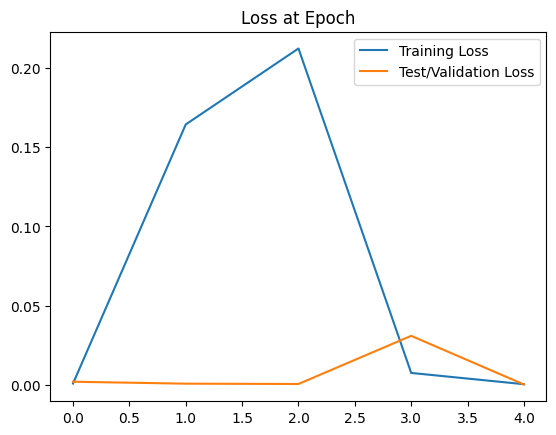

In [25]:
# Graph the Loss at epoch:
train_losses = [tl.item() for tl in train_losses]  
plt.plot(train_losses, label= "Training Loss")
plt.plot(test_losses, label="Test/Validation Loss")
plt.title("Loss at Epoch")
plt.legend()                                                                         

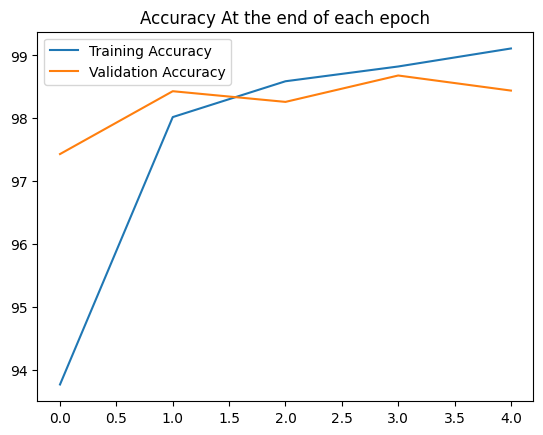

In [26]:
# Graph the accuracy at end of each epoch
plt.plot([t/600 for t in train_correct] , label = "Training Accuracy")
plt.plot([t/100 for t in test_correct], label = "Validation Accuracy")
plt.title("Accuracy At the end of each epoch")
plt.legend()

In [27]:
test_load_everything = DataLoader(test_data, batch_size=10000 , shuffle= False)

In [28]:
with torch.no_grad():
    correct =0
    for X_test,y_test in test_load_everything :
        y_val = model(X_test)
        predicted = torch.max(y_val.data, 1)[1]
        correct += (predicted==y_test).sum()
         

In [29]:
# Check for correct
correct.item()/len(test_data)*100

98.44000000000001

In [30]:
# Grab an image

test_data[4143]   #Tensor with an image in it

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [31]:
# Grab just the data:
test_data[4412]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1294,
           0.9529, 0.5608, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.7412,
           0.9961, 0.1294, 0.0000, 0.0000, 

In [32]:
# Reshape the data:
test_data[4412][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1294, 0.9529, 0.5608,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.7412, 0.9961, 0.1294,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

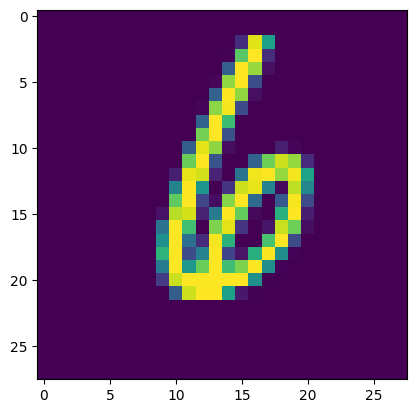

In [33]:
# SHow the image:
plt.imshow(test_data[4412][0].reshape(28,28))

In [34]:
# Pass the image thru our model
model.eval()
with torch.no_grad():
    new_predicition = model(test_data[4412][0].view(1,1,28,28)) # batch size 1, 1 color chanel, 28x28 pixel size
    

In [35]:
# Check the new prediction....get probs:
new_predicition

tensor([[-1.2862e+01, -2.3035e+01, -2.9364e+01, -2.1489e+01, -2.2618e+01,
         -1.7875e+01, -2.6226e-06, -3.4779e+01, -1.7166e+01, -2.5172e+01]])

In [36]:
# Showing actual prediction:
digit = torch.max(new_predicition,1)[1]
x = digit.item()
print(x)

6
